In [2]:
from google.colab import files
uploaded = files.upload()



Saving Mall_Customers.csv to Mall_Customers (1).csv


In [3]:
import pandas as pd

# Load dataset (replace with your file name if different)
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


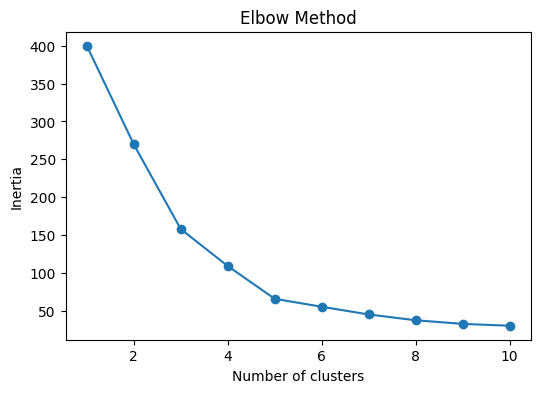

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2️⃣ Elbow method to pick k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # n_init=10 avoids errors in new scikit-learn
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# 3️⃣ Apply K-Means with chosen k (say 5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = y_kmeans


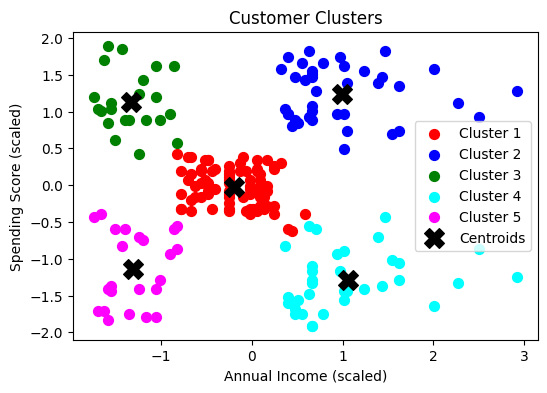

In [19]:
plt.figure(figsize=(6,4))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']  # for up to 5 clusters

for i in range(5):
    plt.scatter(X_scaled[y_kmeans==i, 0], X_scaled[y_kmeans==i, 1],
                s=50, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='black', marker='X', label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Clusters')
plt.legend()
plt.show()


In [21]:
# Rename columns to remove spaces/special characters
df.rename(columns={
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)


In [24]:
X = df[['Annual_Income', 'Spending_Score']]

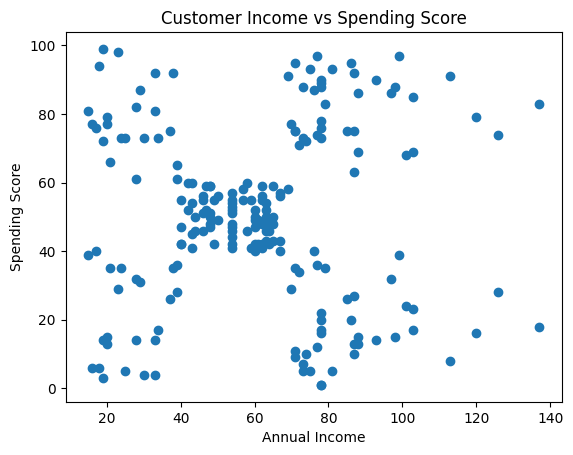

In [26]:
plt.scatter(X['Annual_Income'], X['Spending_Score'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Income vs Spending Score')
plt.show()


# Mall Customer Segmentation

This project clusters mall customers based on their annual income and spending score using K-Means clustering.

**Dataset:** Mall Customer Segmentation (Kaggle)  
**Tools & Libraries:** Python, Pandas, Matplotlib, Scikit-learn  

## Steps Completed:
1. Selected `Annual_Income` and `Spending_Score` as features
2. Scaled the features using StandardScaler
3. Determined the optimal number of clusters using the Elbow Method
4. Applied K-Means clustering
5. Added cluster labels to the dataset
6. Visualized clusters in 2D with centroids

## Visualization:
- Each color represents a different customer cluster
- Black X markers are cluster centroids
